In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv("flights_data.csv")

In [80]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,Spice Jet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,Spice Jet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,Air Asia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [82]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [83]:
data.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [84]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,Spice Jet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,Spice Jet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,Air Asia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Q.1 Which airline offers the lowest average ticket price?**

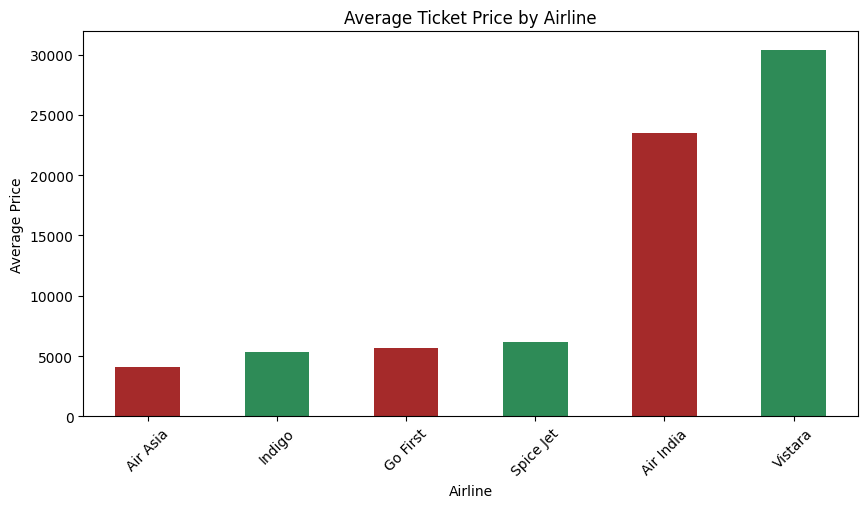

In [85]:
avg_price_airline = data.groupby('airline')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_price_airline.plot(kind='bar', color = ['brown', 'seagreen'])
plt.title("Average Ticket Price by Airline")
plt.ylabel("Average Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.show()

**Q.2 Does departure time significantly affect flight prices?**

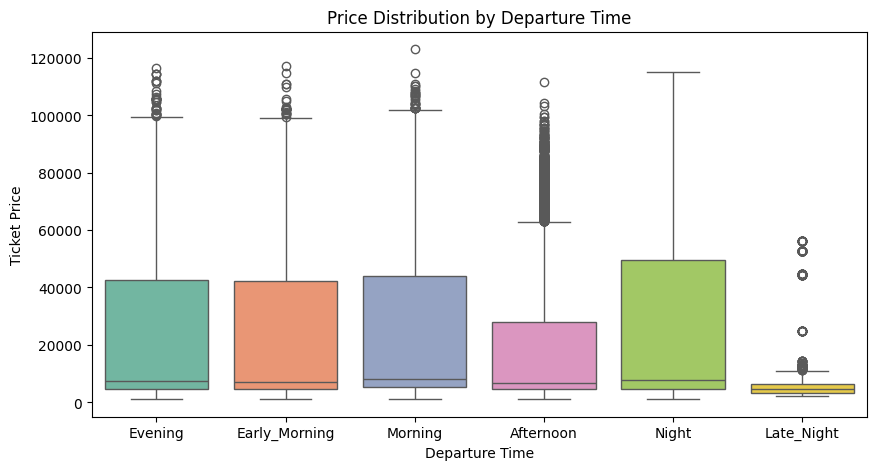

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='departure_time', y='price', hue='departure_time', data=data, palette='Set2', legend=False        
)
plt.title("Price Distribution by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Ticket Price")
plt.show()

**Q.3 Are late-night or early-morning flights cheaper?**

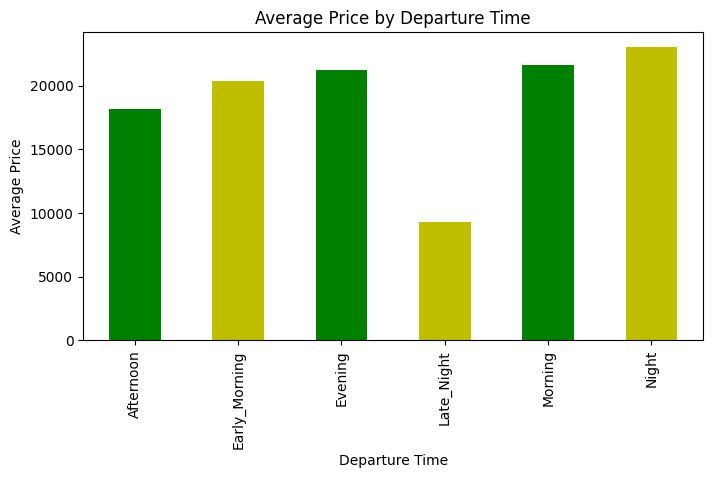

In [87]:
time_price = data.groupby('departure_time')['price'].mean()

plt.figure(figsize=(8,4))
time_price.plot(kind='bar', color = ['g', 'y']
)
plt.title("Average Price by Departure Time")
plt.ylabel("Average Price")
plt.xlabel("Departure Time")
plt.show()

**Q.4 How does flight duration impact ticket pricing?**

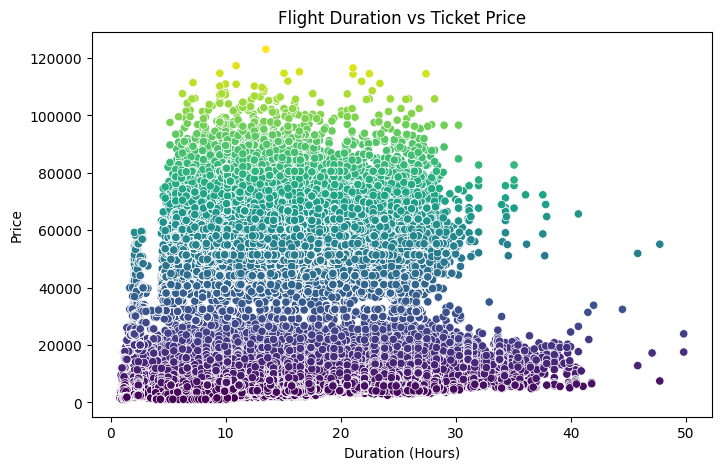

In [88]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', hue='price', data=data, palette='viridis', legend=False
)
plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price")
plt.show()

**Q.5 Which airline shows the highest price variability?**

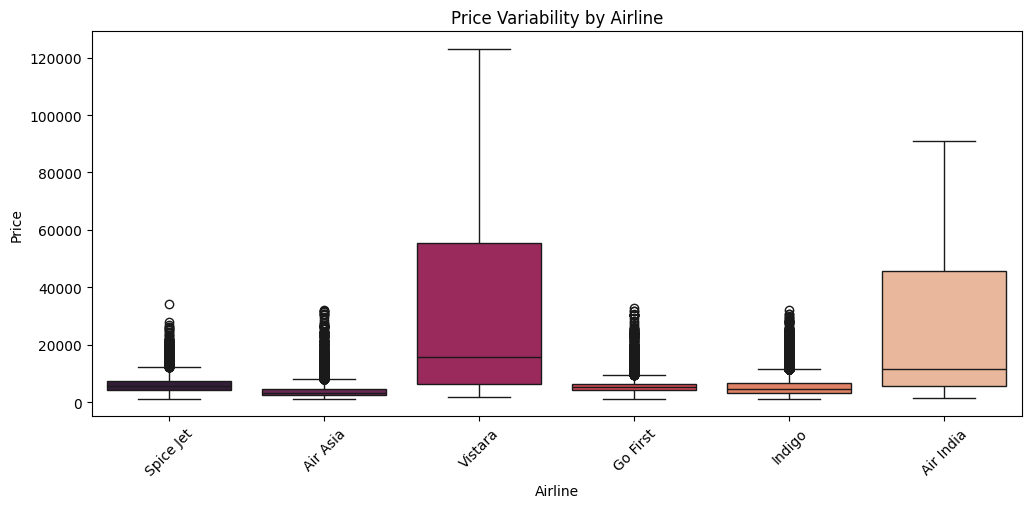

In [89]:
plt.figure(figsize=(12,5))
sns.boxplot(x='airline', y='price', hue='airline', data=data, palette='rocket', legend=False
)
plt.title("Price Variability by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

**Q.6 Is there a relationship between arrival time and ticket cost?**

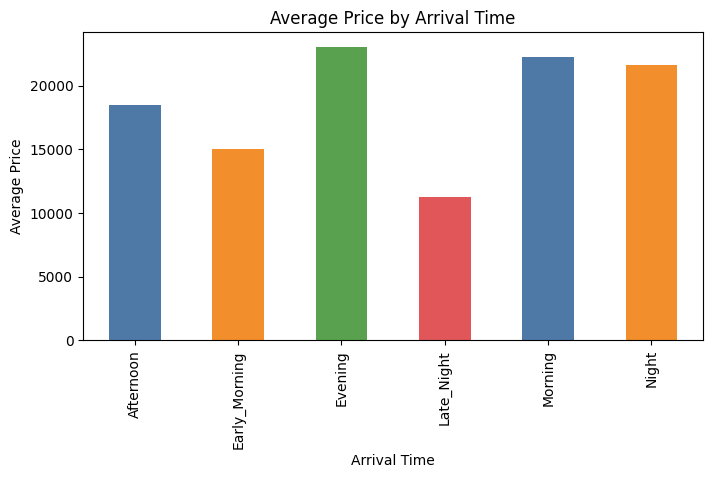

In [90]:
arrival_price = data.groupby('arrival_time')['price'].mean()

colors = ['#4E79A7', '#F28E2B', '#59A14F', '#E15759']

plt.figure(figsize=(8,4))
arrival_price.plot(kind='bar', color=colors)
plt.title("Average Price by Arrival Time")
plt.ylabel("Average Price")
plt.xlabel("Arrival Time")
plt.show()

**Q.7 Which routes or airlines are price-efficient for customers?**

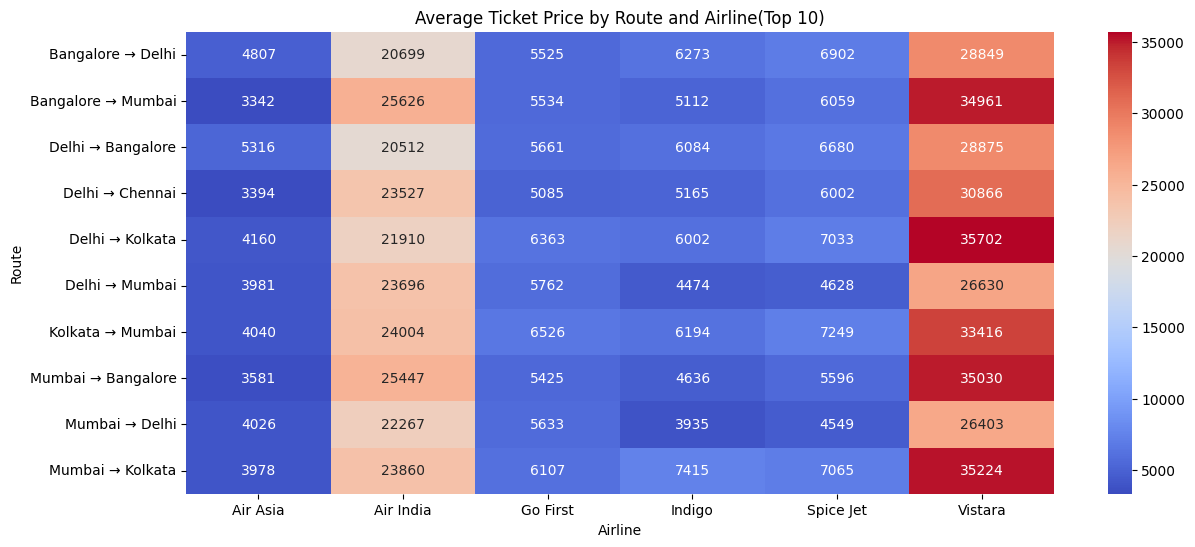

In [91]:
data['route'] = data['source_city'] + " → " + data['destination_city']

top_10_routes = data['route'].value_counts().head(10).index

filtered_data = data[data['route'].isin(top_10_routes)]

route_price = filtered_data.pivot_table(values='price', index='airline', columns='route', aggfunc='mean')

route_price = route_price.T

plt.figure(figsize=(14,6))
sns.heatmap(route_price, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Average Ticket Price by Route and Airline(Top 10)")
plt.xlabel("Airline")
plt.ylabel("Route")
plt.show()

**Q.8 Can airlines be grouped into budget vs premium based on pricing?**

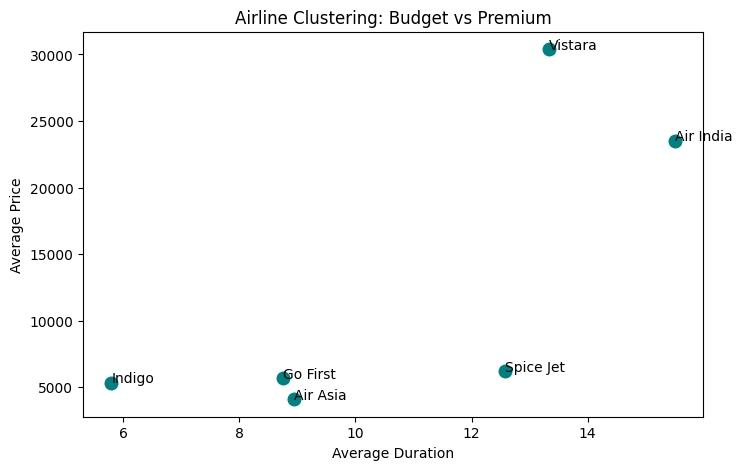

In [92]:
airline_summary = data.groupby('airline').agg({
    'price': 'mean',
    'duration': 'mean'
}).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', data=airline_summary, color='teal', s=120)

for i in range(len(airline_summary)):
    plt.text(
        airline_summary['duration'][i],
        airline_summary['price'][i],
        airline_summary['airline'][i]
    )

plt.title("Airline Clustering: Budget vs Premium")
plt.xlabel("Average Duration")
plt.ylabel("Average Price")
plt.show()